In [1]:
import numpy as np
import pandas as pd

## [National Information Center (NIC)](https://www.ffiec.gov/npw/FinancialReport/DataDownload)
**Tables of structure information for select banks and institutions for which the Federal Reserve has a supervisory, regulatory, or research interest:**
* Relationships data describes ownership between companies (i.e. parent and offspring relationship)
* Transformations data details mergers and acquisitions, includes those provided through government assistance

In [11]:
# read in data from NIC pertaining to FFIEC mergers & aquistions
mergers_acquisitions = pd.read_csv('FFIEC_TRANSFORMATIONS.csv')

# rename transformation type to readable finacial interpretations (refer to FOMC Data Dictionary)
transformation_type = {1:'Charter Discontinued (Merger or Purchase & Assumption)', 5: 'Split', 7: 'Sale of Assets', 
                       9: 'Charter Retained (Merger or Purchase & Assumption)', 
                       50: 'Failure, Government Assistance Provided'}
mergers_acquisitions['TRNSFM_CD'] = mergers_acquisitions['TRNSFM_CD'].replace(transformation_type)

In [20]:
# count the number of mergers & aquistions for each RSSD succesor 
ma_count = mergers_acquisitions.groupby(['ID_RSSD_SUCCESSOR', 'TRNSFM_CD'])[['DT_TRANS']].count()
ma_count = ma_count.sort_values(by='DT_TRANS', ascending=False)
ma_count.to_csv('merger_aquisition_count.csv')

In [15]:
mergers_acquisitions

,#ID_RSSD_PREDECESSOR,ID_RSSD_SUCCESSOR,D_DT_TRANS,TRNSFM_CD,ACCT_METHOD,DT_TRANS
0,28,75026,01/01/1994 00:00:00,Charter Discontinued (Merger or Purchase & Ass...,0,19940101
1,46,1003848,10/01/1993 00:00:00,Charter Discontinued (Merger or Purchase & Ass...,0,19931001
2,55,951951,01/11/1982 00:00:00,Charter Discontinued (Merger or Purchase & Ass...,0,19820111
3,64,1213683,07/30/1988 00:00:00,"Failure, Government Assistance Provided",0,19880730
4,82,41393,01/01/2000 00:00:00,Charter Discontinued (Merger or Purchase & Ass...,0,20000101
...,...,...,...,...,...,...
56389,5522954,5523102,12/31/2020 00:00:00,Charter Discontinued (Merger or Purchase & Ass...,0,20201231
56390,5538160,5563229,12/31/2020 00:00:00,Charter Discontinued (Merger or Purchase & Ass...,0,20201231
56391,5555756,5523102,06/10/2020 00:00:00,Charter Discontinued (Merger or Purchase & Ass...,0,20200610
56392,5555765,5523102,07/31/2020 00:00:00,Charter Discontinued (Merger or Purchase & Ass...,0,20200731


In [31]:
# read in data from NIC pertaining to FFIEC mergers & aquistions
relationships = pd.read_csv('FFIEC_RELATIONSHIPS.csv')
rel_count = relationships.groupby('#ID_RSSD_PARENT')[['D_DT_START']].count().sort_values(by='D_DT_START', ascending=False)
rel_count.to_csv('rssd_relationships.csv')

In [32]:
relationships

,#ID_RSSD_PARENT,ID_RSSD_OFFSPRING,D_DT_START,RELN_LVL,CTRL_IND,D_DT_RELN_EST,EQUITY_IND,OTHER_BASIS_IND,PCT_EQUITY,PCT_OTHER,...,REG_IND,PCT_EQUITY_BRACKET,PCT_EQUITY_FORMAT,D_DT_END,MB_COST,FC_IND,REGK_INV,DT_END,DT_RELN_EST,DT_START
0,130,1081305,06/27/1984 00:00:00,1,1,06/27/1984 00:00:00,2,0,80.0,0.0,...,1,80-100,BRACKET,02/14/1986 00:00:00,0,0,0,19860214,19840627,19840627
1,279,3923155,01/23/2008 00:00:00,1,1,01/23/2008 00:00:00,2,0,100.0,0.0,...,1,100,BRACKET,12/31/9999 00:00:00,0,0,0,99991231,20080123,20080123
2,505,2913168,05/27/1999 00:00:00,1,1,05/27/1999 00:00:00,2,0,80.0,0.0,...,1,80-100,BRACKET,06/29/2007 00:00:00,0,0,0,20070629,19990527,19990527
3,505,2913168,06/30/2007 00:00:00,1,1,05/27/1999 00:00:00,2,0,100.0,0.0,...,1,100,BRACKET,12/31/9999 00:00:00,0,0,0,99991231,19990527,20070630
4,505,3079566,06/01/2000 00:00:00,1,1,06/01/2000 00:00:00,2,0,80.0,0.0,...,1,80-100,BRACKET,02/12/2003 00:00:00,0,0,0,20030212,20000601,20000601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266827,5613599,5613629,04/28/2021 00:00:00,1,1,04/28/2021 00:00:00,0,1,0.0,0.0,...,1,0,N/A,12/31/9999 00:00:00,0,0,0,99991231,20210428,20210428
266828,5613610,5613629,04/28/2021 00:00:00,1,1,04/28/2021 00:00:00,0,1,0.0,0.0,...,1,0,N/A,12/31/9999 00:00:00,0,0,0,99991231,20210428,20210428
266829,5613629,5613487,04/28/2021 00:00:00,1,1,04/28/2021 00:00:00,0,1,0.0,0.0,...,1,0,N/A,12/31/9999 00:00:00,0,0,0,99991231,20210428,20210428
266830,5613638,5613647,04/30/2021 00:00:00,1,1,04/30/2021 00:00:00,2,0,100.0,0.0,...,1,100,BRACKET,12/31/9999 00:00:00,0,0,0,99991231,20210430,20210430


In [ ]:
# points = list(zip(X['ID_RSSD_OFFSPRING'] , X['#ID_RSSD_PARENT']))

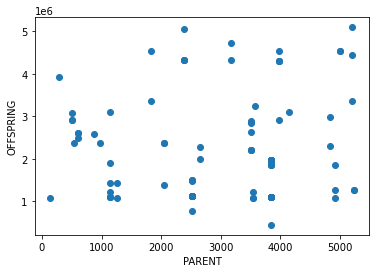

In [44]:
a = [('B', 'A'), ('C', 'B'), ('D', 'B'), ('E', 'B'), ('F', 'A'), ('G', 'F'), ('H', 'A'), ('J', 'H'), ('K', 'J')]